In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import importlib
import rfm_q
importlib.reload(rfm_q)  # Reload the updated module
from rfm_q import q_rfm



In [54]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
print(Aer.backends())


[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


In [55]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [56]:
# set data path
def set_data_path():
    return "../data/"
#     raise NotImplementedError

In [57]:
def pre_process(torchset,n_samples,num_classes=10):
    indices = list(np.random.choice(len(torchset),n_samples))

    trainset = []
    for ix in indices:
        x,y = torchset[ix]
        ohe_y = torch.zeros(num_classes)
        ohe_y[y] = 1
        trainset.append(((x/np.linalg.norm(x)).reshape(-1),ohe_y))
    return trainset

In [58]:
# load svhn data
transform = transforms.Compose([
    transforms.ToTensor()
])

data_path = set_data_path() ## set this data path

trainset0 = torchvision.datasets.SVHN(root=data_path,
                                    split = "train",
                                    transform=transform,
                                    download=True)
testset0 = torchvision.datasets.SVHN(root=data_path,
                                    split = "test",
                                    transform=transform,
                                    download=True)

trainset = pre_process(trainset0,n_samples=5000, num_classes=10)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)


testset = pre_process(testset0,n_samples=5000, num_classes=10)
test_loader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)



Using downloaded and verified file: ../data/train_32x32.mat
Using downloaded and verified file: ../data/test_32x32.mat


In [59]:
# rfm import 
from rfm import *

In [60]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


In [61]:
import importlib
import rfm_q
importlib.reload(rfm_q)
from rfm_q import q_rfm


In [62]:
import qiskit


In [12]:
# import torch
# import numpy as np
# from torch.utils.data import DataLoader, TensorDataset
# from scipy.io import loadmat
# from sklearn.decomposition import PCA
# ##########################
# # 1) Load the .mat files  #
# ###########################

# train_mat_path = "/data/yi/recursive_feature_machines_1/data/train_32x32.mat"
# test_mat_path  = "/data/yi/recursive_feature_machines_1/data/test_32x32.mat"

# train_data = loadmat(train_mat_path)
# test_data  = loadmat(test_mat_path)

# # For an SVHN-like dataset:
# #   X has shape (height=32, width=32, channels=3, N=number_of_samples)
# #   y has shape (N,1)
# X_train = train_data["X"]  # shape (32, 32, 3, N)
# y_train = train_data["y"]  # shape (N, 1)
# X_test  = test_data["X"]   # shape (32, 32, 3, N)
# y_test  = test_data["y"]   # shape (N, 1)

# print("Original X_train shape:", X_train.shape)  # e.g. (32,32,3,N)
# print("Original y_train shape:", y_train.shape)  # e.g. (N,1)

# ###########################
# # 2) Reshape / Transpose  #
# ###########################

# # Transpose X from [H,W,C,N] -> [N,C,H,W] so it matches PyTorch's [N, C, H, W] format
# X_train = np.transpose(X_train, (3, 2, 0, 1))  # shape now [N, 3, 32, 32]
# X_test  = np.transpose(X_test,  (3, 2, 0, 1))  # shape now [N, 3, 32, 32]

# # Flatten y from [N,1] -> [N]
# y_train = y_train.flatten()
# y_test  = y_test.flatten()

# print("After transpose, X_train shape:", X_train.shape)  # e.g. (N, 3, 32, 32)
# print("After flatten, y_train shape:", y_train.shape)    # e.g. (N,)

# ##############################
# # 3) Flatten for PCA (Optional)
# ##############################

# def flatten_dataset(X, y):
#     """
#     Flatten images from [N, C, H, W] -> [N, C*H*W].
#     Returns X_flat, y (unchanged).
#     """
#     N, C, H, W = X.shape
#     X_flat = X.reshape(N, -1)  # shape [N, 3*32*32=3072] if 3-channel
#     return X_flat, y

# X_train_flat, y_train = flatten_dataset(X_train, y_train)
# X_test_flat,  y_test  = flatten_dataset(X_test,  y_test)

# ##############################
# # 4) Apply PCA (Optional)    #
# ##############################

# def reduce_dimensionality(X, n_components=8):
#     pca = PCA(n_components=n_components)
#     return pca.fit_transform(X)

# # From 3072 -> 8 dims, for example
# X_train_pca = reduce_dimensionality(X_train_flat, n_components=8)
# X_test_pca  = reduce_dimensionality(X_test_flat,  n_components=8)

# print("X_train_pca shape:", X_train_pca.shape)  # e.g. [N, 8]
# print("y_train shape:", y_train.shape)          # e.g. [N]

# ##############################
# # 5) Wrap in DataLoaders     #
# ##############################

# # Convert NumPy arrays to PyTorch tensors
# X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train,       dtype=torch.long)
# X_test_tensor  = torch.tensor(X_test_pca,    dtype=torch.float32)
# y_test_tensor  = torch.tensor(y_test,        dtype=torch.long)

# # Create TensorDatasets
# train_pca_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_pca_dataset  = TensorDataset(X_test_tensor,  y_test_tensor)

# # Finally create DataLoaders
# train_pca_loader = DataLoader(train_pca_dataset, batch_size=128, shuffle=True)
# test_pca_loader  = DataLoader(test_pca_dataset,  batch_size=128, shuffle=False)

# ##############################
# # 6) Use these in your RFM   #
# ##############################

# # Now you can call your quantum RFM function:
# # from rfm_q import q_rfm
# # M, mse = q_rfm(train_pca_loader, test_pca_loader, iters=2, loader=True, classif=True)

In [64]:
# # %% [code]
# # --- Section 1: Laplacian Quantum Kernel with Dummy Data ---

# import numpy as np
# import torch
# import time

# # Qiskit imports
# from qiskit.circuit.library import ZZFeatureMap
# from qiskit_aer import Aer
# from qiskit_machine_learning.kernels import FidelityQuantumKernel

# # -------------------------------
# # Helper Functions Definitions
# # -------------------------------

# def encode_features(X):
#     """
#     Scales each column of X to [0, 1] then multiplies by pi.
#     """
#     X = X.copy()
#     for j in range(X.shape[1]):
#         col_min = X[:, j].min()
#         col_max = X[:, j].max()
#         if abs(col_max - col_min) < 1e-12:
#             X[:, j] = 0.0
#         else:
#             X[:, j] = (X[:, j] - col_min) / (col_max - col_min)
#     X *= np.pi
#     return X

# def quantum_kernel_matrix(X1, X2, q_kernel, M=None, do_encode=True):
#     """
#     Evaluates the quantum kernel matrix for inputs X1 and X2.
#     Applies optional encoding (scaling) and a linear transformation via M.
#     """
#     # Convert torch.Tensor to NumPy arrays if needed.
#     if isinstance(X1, torch.Tensor):
#         X1 = X1.cpu().numpy()
#     if isinstance(X2, torch.Tensor):
#         X2 = X2.cpu().numpy()

#     # Optional encoding: scale data from [0,1] to [0,pi]
#     if do_encode:
#         X1 = encode_features(X1)
#         X2 = encode_features(X2)

#     # If M is provided, transform the data via its Cholesky factorization.
#     if M is not None:
#         sqrtM = np.real_if_close(np.linalg.cholesky(M))
#         X1 = X1 @ sqrtM
#         X2 = X2 @ sqrtM

#     print("[DEBUG] Evaluating Quantum Kernel...")
#     start_time = time.time()
#     K = q_kernel.evaluate(x_vec=X1, y_vec=X2)
#     end_time = time.time()
#     print(f"[DEBUG] Kernel evaluated: shape {K.shape}, time {end_time - start_time:.2f} s")
#     return K

# def quantum_laplacian_M(samples, centers, bandwidth, M, q_kernel, do_encode=True):
#     """
#     Computes a Laplacian-style quantum kernel matrix.
    
#     The quantum kernel is first evaluated (using q_kernel with the M-transformation),
#     then converted into a distance measure (1 - fidelity), and finally transformed via:
#         k(x,y) = exp(-gamma * distance(x,y))
#     where gamma = 1/bandwidth.
    
#     Args:
#         samples (np.ndarray or torch.Tensor): Input data samples.
#         centers (np.ndarray or torch.Tensor): Center points.
#         bandwidth (float): Bandwidth parameter (must be > 0).
#         M (np.ndarray): Transformation matrix.
#         q_kernel: A quantum kernel instance (e.g., FidelityQuantumKernel).
#         do_encode (bool): Whether to encode features (scaling to [0,pi]).
    
#     Returns:
#         np.ndarray: Laplacian quantum kernel matrix.
#     """
#     assert bandwidth > 0, "Bandwidth must be greater than 0."
    
#     print("[DEBUG] Evaluating quantum kernel fidelity matrix...")
#     kernel_mat = quantum_kernel_matrix(samples, centers, q_kernel, M=M, do_encode=do_encode)
    
#     # Convert fidelity to a quantum distance (1 - fidelity)
#     quantum_distance = 1 - kernel_mat
#     quantum_distance = np.maximum(quantum_distance, 0)  # ensure non-negative
#     print("[DEBUG] Quantum distance matrix computed (1 - fidelity).")
    
#     # Apply Laplacian transformation
#     gamma = 1.0 / bandwidth
#     print(f"[DEBUG] Applying Laplacian transformation with gamma = {gamma:.4f}...")
#     laplacian_kernel = np.exp(-gamma * quantum_distance)
#     print("[DEBUG] Laplacian quantum kernel matrix computed.")
#     return laplacian_kernel

# # -------------------------------
# # Dummy Data Demonstration
# # -------------------------------

# # Generate dummy data
# np.random.seed(0)
# samples = np.random.rand(10, 8)    # 10 samples, 8 features
# centers = np.random.rand(5, 8)     # 5 centers, 8 features
# bandwidth = 1.0
# M = np.eye(8, dtype='float32')     # Identity matrix for transformation

# # Set up the quantum kernel using Qiskit's FidelityQuantumKernel.
# feature_dim = 8  # Must match the data feature dimension
# feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement="full")
# backend = Aer.get_backend("aer_simulator_statevector")
# # Disable PSD enforcement to speed up evaluation.
# q_kernel = FidelityQuantumKernel(feature_map=feature_map, enforce_psd=False)

# # Compute the Laplacian quantum kernel matrix with dummy data.
# K_lap = quantum_laplacian_M(samples, centers, bandwidth, M, q_kernel, do_encode=True)
# print("Laplacian Quantum Kernel Matrix (Dummy Data):\n", K_lap)


# # %% [code]
# # --- Section 2: Running q_rfm with Your .mat Data ---
# #
# # Assumptions:
# #   - Your training and testing data are stored in 'train_data.mat' and 'test_data.mat'
# #   - The .mat files contain:
# #         X: shape (32, 32, 3, N)   (images)
# #         y: shape (N, 1)           (labels)
# #
# # This section loads the data, preprocesses it (flattening images),
# # and creates PyTorch DataLoaders to run the quantum RFM.

# import scipy.io
# import torch
# from torch.utils.data import TensorDataset, DataLoader

# # Import the q_rfm and get_data functions from your module.
# from rfm_q import q_rfm, get_data

# # Load your .mat files.
# train_data = scipy.io.loadmat('/data/yi/recursive_feature_machines_1/data/train_32x32.mat')
# test_data = scipy.io.loadmat('/data/yi/recursive_feature_machines_1/data/test_32x32.mat')

# # Extract data (adjust the key names if they differ).
# X_train = train_data["X"]   # shape: (32, 32, 3, N)
# y_train = train_data["y"]   # shape: (N, 1)
# X_test  = test_data["X"]    # shape: (32, 32, 3, N)
# y_test  = test_data["y"]    # shape: (N, 1)

# # Rearrange and flatten image data:
# # Current shape is (32, 32, 3, N); we transpose to (N, 32, 32, 3) then flatten.
# X_train = np.transpose(X_train, (3, 0, 1, 2))
# X_test  = np.transpose(X_test, (3, 0, 1, 2))
# X_train = X_train.reshape(X_train.shape[0], -1)  # shape: (N, 32*32*3)
# X_test  = X_test.reshape(X_test.shape[0], -1)

# # Process labels: flatten if needed.
# y_train = y_train.flatten()
# y_test  = y_test.flatten()

# # Convert data to torch tensors.
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # change dtype if needed
# X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor  = torch.tensor(y_test, dtype=torch.float32)

# # Create DataLoaders.
# batch_size = 32  # or adjust as desired
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# # Run the quantum RFM. (iters=2 for a quick demo; adjust iters as needed.)
# # M_final, mse = q_rfm(train_loader, test_loader, iters=2, loader=True, classif=True)
# K_lap = quantum_laplacian_M(X_train, y_train, bandwidth, M, q_kernel, do_encode=True)
# print("Laplacian Quantum Kernel Matrix (Dummy Data):\n", K_lap)
# print("Final MSE from q_rfm on .mat data:", mse)


# %% [code]
# --- Section 1: Laplacian Quantum Kernel with Dummy Data ---

import numpy as np
import torch
import time

# Qiskit imports
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import Aer
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# -------------------------------
# Helper Functions Definitions
# -------------------------------

def encode_features(X):
    """
    Scales each column of X to [0, 1] then multiplies by pi.
    """
    X = X.copy().astype(np.float64)  # ensure float type to avoid uint8 issues
    for j in range(X.shape[1]):
        col_min = X[:, j].min()
        col_max = X[:, j].max()
        if abs(col_max - col_min) < 1e-12:
            X[:, j] = 0.0
        else:
            X[:, j] = (X[:, j] - col_min) / (col_max - col_min)
    X *= np.pi
    return X

def quantum_kernel_matrix(X1, X2, q_kernel, M=None, do_encode=True):
    """
    Evaluates the quantum kernel matrix for inputs X1 and X2.
    Applies optional encoding (scaling) and a linear transformation via M.
    """
    # Convert torch.Tensor to NumPy arrays if needed.
    if isinstance(X1, torch.Tensor):
        X1 = X1.cpu().numpy()
    if isinstance(X2, torch.Tensor):
        X2 = X2.cpu().numpy()

    # Optional encoding: scale data from [0,1] to [0,pi]
    if do_encode:
        X1 = encode_features(X1)
        X2 = encode_features(X2)

    # If M is provided, transform the data via its Cholesky factorization.
    if M is not None:
        sqrtM = np.real_if_close(np.linalg.cholesky(M))
        X1 = X1 @ sqrtM
        X2 = X2 @ sqrtM

    print("[DEBUG] Evaluating Quantum Kernel...")
    start_time = time.time()
    K = q_kernel.evaluate(x_vec=X1, y_vec=X2)
    end_time = time.time()
    print(f"[DEBUG] Kernel evaluated: shape {K.shape}, time {end_time - start_time:.2f} s")
    return K

def quantum_laplacian_M(samples, centers, bandwidth, M, q_kernel, do_encode=True):
    """
    Computes a Laplacian-style quantum kernel matrix.
    
    The quantum kernel is first evaluated (using q_kernel with the M-transformation),
    then converted into a distance measure (1 - fidelity), and finally transformed via:
        k(x,y) = exp(-gamma * distance(x,y))
    where gamma = 1/bandwidth.
    
    Args:
        samples (np.ndarray or torch.Tensor): Input data samples.
        centers (np.ndarray or torch.Tensor): Center points.
        bandwidth (float): Bandwidth parameter (must be > 0).
        M (np.ndarray): Transformation matrix.
        q_kernel: A quantum kernel instance (e.g., FidelityQuantumKernel).
        do_encode (bool): Whether to encode features (scaling to [0,pi]).
    
    Returns:
        np.ndarray: Laplacian quantum kernel matrix.
    """
    assert bandwidth > 0, "Bandwidth must be greater than 0."
    
    print("[DEBUG] Evaluating quantum kernel fidelity matrix...")
    kernel_mat = quantum_kernel_matrix(samples, centers, q_kernel, M=M, do_encode=do_encode)
    q_kernel = FidelityQuantumKernel(feature_map=feature_map, enforce_psd=False, max_circuits_per_job=500)
    # Convert fidelity to a quantum distance (1 - fidelity)
    quantum_distance = 1 - kernel_mat
    quantum_distance = np.maximum(quantum_distance, 0)  # ensure non-negative
    print("[DEBUG] Quantum distance matrix computed (1 - fidelity).")
    
    # Apply Laplacian transformation
    gamma = 1.0 / bandwidth
    print(f"[DEBUG] Applying Laplacian transformation with gamma = {gamma:.4f}...")
    laplacian_kernel = np.exp(-gamma * quantum_distance)
    print("[DEBUG] Laplacian quantum kernel matrix computed.")
    return laplacian_kernel

# -------------------------------
# Dummy Data Demonstration
# -------------------------------

# Generate dummy data
np.random.seed(0)
samples = np.random.rand(10, 8)    # 10 samples, 8 features
centers = np.random.rand(5, 8)     # 5 centers, 8 features
bandwidth = 1.0
M = np.eye(8, dtype='float32')     # Identity matrix for transformation

# Set up the quantum kernel using Qiskit's FidelityQuantumKernel.
feature_dim = 8  # Must match the data feature dimension
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement="full")
backend = Aer.get_backend("aer_simulator_statevector")
backend.options.num_threads = 60
# Disable PSD enforcement to speed up evaluation.
q_kernel = FidelityQuantumKernel(feature_map=feature_map, enforce_psd=False, max_circuits_per_job=500)

# Compute the Laplacian quantum kernel matrix with dummy data.
K_lap = quantum_laplacian_M(samples, centers, bandwidth, M, q_kernel, do_encode=True)
print("Laplacian Quantum Kernel Matrix (Dummy Data):\n", K_lap)


# %% [code]
# --- Section 2: Running q_rfm with Your .mat Data ---
#
# Assumptions:
#   - Your training and testing data are stored in '/data/yi/recursive_feature_machines_1/data/train_32x32.mat'
#     and '/data/yi/recursive_feature_machines_1/data/test_32x32.mat'
#   - The .mat files contain:
#         X: shape (32, 32, 3, N)   (images)
#         y: shape (N, 1)           (labels)
#
# This section loads the data, preprocesses it (flattening images),
# and creates PyTorch DataLoaders to run the quantum RFM.

import scipy.io
import torch
from torch.utils.data import TensorDataset, DataLoader

# Import the q_rfm and get_data functions from your module.
from rfm_q import q_rfm, get_data

# Load your .mat files.
train_data = scipy.io.loadmat('/data/yi/recursive_feature_machines_1/data/train_32x32.mat')
test_data = scipy.io.loadmat('/data/yi/recursive_feature_machines_1/data/test_32x32.mat')

# Extract data (adjust the key names if they differ).
X_train = train_data["X"]   # shape: (32, 32, 3, N)
y_train = train_data["y"]   # shape: (N, 1)
X_test  = test_data["X"]    # shape: (32, 32, 3, N)
y_test  = test_data["y"]    # shape: (N, 1)

# Rearrange and flatten image data:
# Current shape is (32, 32, 3, N); we transpose to (N, 32, 32, 3) then flatten.
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test  = np.transpose(X_test, (3, 0, 1, 2))
X_train = X_train.reshape(X_train.shape[0], -1)  # shape: (N, 32*32*3)
X_test  = X_test.reshape(X_test.shape[0], -1)

# Convert image data to float (this is critical to avoid the uint8 error)
X_train = X_train.astype(np.float32)
X_test  = X_test.astype(np.float32)

# Process labels: flatten if needed.
y_train = y_train.flatten()
y_test  = y_test.flatten()

# Convert data to torch tensors.
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # change dtype if needed
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders.
batch_size = 32  # or adjust as desired
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# After flattening your image data, update M to match the number of features.
M = np.eye(X_train.shape[1], dtype='float32')

# Example: Compute a Laplacian quantum kernel using X_train as both samples and centers.
# (Using y_train as centers is not valid since they are labels.)
K_lap_mat = quantum_laplacian_M(X_train, X_train, bandwidth, M, q_kernel, do_encode=True)
print("Laplacian Quantum Kernel Matrix (MAT Data):\n", K_lap_mat)

# Optionally, run the quantum RFM.
# (Uncomment the following two lines if you wish to run q_rfm.)
# M_final, mse = q_rfm(samples, centers, iters=2, loader=True, classif=True)
# print("Final MSE from q_rfm on .mat data:", mse)


[DEBUG] Evaluating quantum kernel fidelity matrix...
[DEBUG] Evaluating Quantum Kernel...
[DEBUG] Kernel evaluated: shape (10, 5), time 0.71 s
[DEBUG] Quantum distance matrix computed (1 - fidelity).
[DEBUG] Applying Laplacian transformation with gamma = 1.0000...
[DEBUG] Laplacian quantum kernel matrix computed.
Laplacian Quantum Kernel Matrix (Dummy Data):
 [[0.36815895 0.37313502 0.37052284 0.3744439  0.37221816]
 [0.36910162 0.36822857 0.36877155 0.36956059 0.36840771]
 [0.37334294 0.36935135 0.36900308 0.36888126 0.38118131]
 [0.3680208  0.37102013 0.3685181  0.37123795 0.36901149]
 [0.36874256 0.37191494 0.37253554 0.36940608 0.36983414]
 [0.36813563 0.37168031 0.3702018  0.36966791 0.36830368]
 [0.37181372 0.37609747 0.37077498 0.36997134 0.37533182]
 [0.37014749 0.3723179  0.36997881 0.36875583 0.36861336]
 [0.36912481 0.36882297 0.36790315 0.36834884 0.38690327]
 [0.36942903 0.36828568 0.37166452 0.36945387 0.36822303]]
[DEBUG] Evaluating quantum kernel fidelity matrix...
[DEB

KeyboardInterrupt: 

In [116]:
train_data = scipy.io.loadmat('/data/yi/recursive_feature_machines_1/example_notebooks/data/4x4MNIST_Train&Test/4x4MNIST_Train&Test/MNIST_Train_Nox16.mat')
test_data = scipy.io.loadmat('/data/yi/recursive_feature_machines_1/example_notebooks/data/4x4MNIST_Train&Test/4x4MNIST_Train&Test/MNIST_Test_Nox16.mat')

X_train = train_data['VV'][:500]
X_test = test_data['UU'][:100]

print(X_train.shape)
print(X_test.shape)

(500, 16)
(100, 16)


In [117]:
import csv

# Initialize an empty list to store the first column values.
y_train = []
y_test = []
# Specify your CSV file path.
csv_file_path1 = '/data/yi/recursive_feature_machines_1/example_notebooks/data/4x4MNIST_Train&Test/mnist_train.csv'
csv_file_path2 = '/data/yi/recursive_feature_machines_1/example_notebooks/data/4x4MNIST_Train&Test/mnist_test.csv'
# Open the CSV file in read mode.
with open(csv_file_path1, newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    
    # Iterate over each row in the CSV file.
    for row in csvreader:
        if row:  # Ensure the row is not empty.
            # Append the first column (index 0) to the list.
            y_train.append(int(row[0]))

with open(csv_file_path2, newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    
    # Iterate over each row in the CSV file.
    for row in csvreader:
        if row:  # Ensure the row is not empty.
            # Append the first column (index 0) to the list.
            y_test.append(int(row[0]))

num_classes = 10
y_train = np.eye(num_classes)[y_train[:500]]
y_test = np.eye(num_classes)[y_test[:100]]
# Final debug print showing all the data collected from the first column.
print(y_train.shape)
print(y_test.shape)

(500, 10)
(100, 10)


In [ ]:
# %% [code]
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import hickle
from numpy.linalg import solve
import time

# Qiskit imports for the quantum kernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import Aer
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# Dummy get_data function (assumes a DataLoader input)
def get_data(loader):
    X_list, y_list = [], []
    for batch in loader:
        inputs, labels = batch
        X_list.append(inputs)
        y_list.append(labels)
    X = torch.cat(X_list, dim=0)
    y = torch.cat(y_list, dim=0)
    return X, y

# The quantum kernel matrix helper function.
def encode_features(X):
    """Scales each column of X to [0, 1] then multiplies by pi."""
    X = X.copy().astype(np.float64)  # ensure float type
    for j in range(X.shape[1]):
        col_min = X[:, j].min()
        col_max = X[:, j].max()
        if abs(col_max - col_min) < 1e-12:
            X[:, j] = 0.0
        else:
            X[:, j] = (X[:, j] - col_min) / (col_max - col_min)
    X *= np.pi
    return X

def quantum_kernel_matrix(X1, X2, q_kernel, M=None, do_encode=True):
    """
    Evaluates the quantum kernel matrix for inputs X1 and X2.
    Applies optional encoding and a linear transformation via M.
    """
    if isinstance(X1, torch.Tensor):
        X1 = X1.cpu().numpy()
    if isinstance(X2, torch.Tensor):
        X2 = X2.cpu().numpy()

    if do_encode:
        X1 = encode_features(X1)
        X2 = encode_features(X2)

    if M is not None:
        sqrtM = np.real_if_close(np.linalg.cholesky(M))
        X1 = X1 @ sqrtM
        X2 = X2 @ sqrtM

    print("[DEBUG] Evaluating Quantum Kernel...")
    start_time = time.time()
    K = q_kernel.evaluate(x_vec=X1, y_vec=X2)
    end_time = time.time()
    print(f"[DEBUG] Kernel evaluated: shape {K.shape}, time {end_time - start_time:.2f} s")
    return K

def quantum_laplacian_M(samples, centers, bandwidth, M, q_kernel, do_encode=True):
    """
    Computes a Laplacian-style quantum kernel matrix.
    """
    assert bandwidth > 0, "Bandwidth must be > 0."
    print("[DEBUG] Evaluating quantum kernel fidelity matrix...")
    kernel_mat = quantum_kernel_matrix(samples, centers, q_kernel, M=M, do_encode=do_encode)
    quantum_distance = 1 - kernel_mat
    quantum_distance = np.maximum(quantum_distance, 0)
    print("[DEBUG] Quantum distance matrix computed (1 - fidelity).")
    gamma = 1.0 / bandwidth
    print(f"[DEBUG] Applying Laplacian transformation with gamma = {gamma:.4f}...")
    laplacian_kernel = np.exp(-gamma * quantum_distance)
    print("[DEBUG] Laplacian quantum kernel matrix computed.")
    return laplacian_kernel

def q_rfm(train_loader, test_loader,
          iters=3, name=None, batch_size=2, reg=1e-3,
          train_acc=False, loader=True, classif=True):
    print("[DEBUG] Entered q_rfm function...")
    """
    Quantum version of the Recursive Feature Machine.
    """
    # Use dummy training data to set the feature dimension
    X_train_dummy, _ = get_data(train_loader) if loader else train_loader
    feature_dim = X_train_dummy.shape[1]
    feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement="full")
    print("[DEBUG] Initializing Aer backend...")
    backend = Aer.get_backend("aer_simulator_statevector")
    print("[DEBUG] Aer backend initialized successfully")
    
    print("[DEBUG] Creating FidelityQuantumKernel...")
    q_kernel = FidelityQuantumKernel(feature_map=feature_map)
    print("[DEBUG] FidelityQuantumKernel created successfully")
    
    # Quick test kernel evaluation with small random data
    X_test_eval = np.random.rand(10, feature_dim)
    K_test_eval = q_kernel.evaluate(x_vec=X_test_eval, y_vec=X_test_eval)
    print("[DEBUG] Kernel Evaluation Success! Matrix shape:", K_test_eval.shape)
    
    L = 10

    if loader:
        print("[DEBUG] Loaders provided")
        X_train, y_train = get_data(train_loader)
        X_test, y_test = get_data(test_loader)
    else:
        print("[DEBUG] Loaders not used, loading manually")
        X_train, y_train = train_loader
        X_test, y_test = test_loader
        X_train = torch.from_numpy(X_train).float()
        X_test = torch.from_numpy(X_test).float()
        y_train = torch.from_numpy(y_train).float()
        y_test = torch.from_numpy(y_test).float()
    
    print(f"[DEBUG] X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"[DEBUG] X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    
    feature_dim = X_train.shape[1]
    feature_map.feature_dimension = feature_dim
    
    n, d = X_train.shape
    # Start with an identity matrix M for the recursive update.
    M = np.eye(d, dtype='float32')
    
    for i in range(iters):
        print(f"[DEBUG] Iteration {i+1}/{iters} started...")
        print("[DEBUG] Computing K_train...")
        K_train = quantum_kernel_matrix(X_train, X_train, q_kernel)
        print(f"[DEBUG] K_train computed, shape: {K_train.shape}")
        sol = solve(K_train + reg * np.eye(len(K_train)), y_train.numpy()).T
        
        if train_acc:
            preds = (sol @ K_train).T
            y_pred = torch.from_numpy(preds)
            preds_class = torch.argmax(y_pred, dim=-1)
            labels = torch.argmax(y_train, dim=-1)
            count = torch.sum(labels == preds_class).numpy()
            print("Round " + str(i) + " Train Acc: ", count / len(labels))
        
        K_test = quantum_kernel_matrix(X_train, X_test, q_kernel)
        preds = (sol @ K_test).T
        mse = np.mean(np.square(preds - y_test.numpy()))
        print("Round " + str(i) + " MSE: ", mse)
        
        if classif:
            y_pred = torch.from_numpy(preds)
            preds_class = torch.argmax(y_pred, dim=-1)
            labels = torch.argmax(y_test, dim=-1)
            count = torch.sum(labels == preds_class).numpy()
            print("Round " + str(i) + " Acc: ", count / len(labels))
        
        print("[DEBUG] Calling get_grads... (skipped in this dummy demo)")
        # For demonstration, we'll skip the recursive update.
        # M = get_grads(X_train, sol, L, torch.from_numpy(M), q_kernel, batch_size=batch_size)
        print("[DEBUG] get_grads skipped")
    
    K_train = quantum_kernel_matrix(X_train, X_train, q_kernel)
    print("[DEBUG] Solving system of equations...")
    sol = solve(K_train + reg * np.eye(len(K_train)), y_train.numpy()).T
    print("[DEBUG] System solved")
    K_test = quantum_kernel_matrix(X_train, X_test, q_kernel)
    preds = (sol @ K_test).T
    mse = np.mean(np.square(preds - y_test.numpy()))
    print("Final MSE: ", mse)
    
    if classif:
        y_pred = torch.from_numpy(preds)
        preds_class = torch.argmax(y_pred, dim=-1)
        labels = torch.argmax(y_test, dim=-1)
        count = torch.sum(labels == preds_class).numpy()
        print("Final Acc: ", count / len(labels))
    return M, mse

# -------------------------------
# Create Dummy Data for Classification
# -------------------------------

# Settings for dummy data:
num_train = 100
num_test = 20
num_features = 8
num_classes = 3

# # Random input features
# X_train_dummy = np.random.rand(num_train, num_features).astype(np.float32)
# X_test_dummy = np.random.rand(num_test, num_features).astype(np.float32)

# # Random labels: one-hot encoded for 3 classes.
# y_train_dummy = np.eye(num_classes)[np.random.randint(0, num_classes, size=num_train)]
# y_test_dummy = np.eye(num_classes)[np.random.randint(0, num_classes, size=num_test)]

# Convert to torch tensors.
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders.
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Run q_rfm on dummy data to test MSE and accuracy.
M_final, mse_final = q_rfm(train_loader, test_loader, iters=2, loader=True, classif=True, train_acc=True)
print("Final MSE from q_rfm on 4x4 data:", mse_final)


[DEBUG] Entered q_rfm function...
[DEBUG] Initializing Aer backend...
[DEBUG] Aer backend initialized successfully
[DEBUG] Creating FidelityQuantumKernel...
[DEBUG] FidelityQuantumKernel created successfully
[DEBUG] Kernel Evaluation Success! Matrix shape: (10, 10)
[DEBUG] Loaders provided
[DEBUG] X_train shape: torch.Size([500, 16]), y_train shape: torch.Size([500, 10])
[DEBUG] X_test shape: torch.Size([100, 16]), y_test shape: torch.Size([100, 10])
[DEBUG] Iteration 1/2 started...
[DEBUG] Computing K_train...
[DEBUG] Evaluating Quantum Kernel...


In [51]:
# %% [code]
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import hickle
from numpy.linalg import solve
import time

# Qiskit imports for the quantum kernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import Aer
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# Dummy get_data function (assumes a DataLoader input)
def get_data(loader):
    X_list, y_list = [], []
    for batch in loader:
        inputs, labels = batch
        X_list.append(inputs)
        y_list.append(labels)
    X = torch.cat(X_list, dim=0)
    y = torch.cat(y_list, dim=0)
    return X, y

# The quantum kernel matrix helper function.
def encode_features(X):
    """Scales each column of X to [0, 1] then multiplies by pi."""
    X = X.copy().astype(np.float64)  # ensure float type
    for j in range(X.shape[1]):
        col_min = X[:, j].min()
        col_max = X[:, j].max()
        if abs(col_max - col_min) < 1e-12:
            X[:, j] = 0.0
        else:
            X[:, j] = (X[:, j] - col_min) / (col_max - col_min)
    X *= np.pi
    return X

def quantum_kernel_matrix(X1, X2, q_kernel, M=None, do_encode=True):
    """
    Evaluates the quantum kernel matrix for inputs X1 and X2.
    Applies optional encoding and a linear transformation via M.
    """
    if isinstance(X1, torch.Tensor):
        X1 = X1.cpu().numpy()
    if isinstance(X2, torch.Tensor):
        X2 = X2.cpu().numpy()

    if do_encode:
        X1 = encode_features(X1)
        X2 = encode_features(X2)

    if M is not None:
        sqrtM = np.real_if_close(np.linalg.cholesky(M))
        X1 = X1 @ sqrtM
        X2 = X2 @ sqrtM

    print("[DEBUG] Evaluating Quantum Kernel...")
    start_time = time.time()
    K = q_kernel.evaluate(x_vec=X1, y_vec=X2)
    end_time = time.time()
    print(f"[DEBUG] Kernel evaluated: shape {K.shape}, time {end_time - start_time:.2f} s")
    return K

def quantum_laplacian_M(samples, centers, bandwidth, M, q_kernel, do_encode=True):
    """
    Computes a Laplacian-style quantum kernel matrix.
    """
    assert bandwidth > 0, "Bandwidth must be > 0."
    print("[DEBUG] Evaluating quantum kernel fidelity matrix...")
    kernel_mat = quantum_kernel_matrix(samples, centers, q_kernel, M=M, do_encode=do_encode)
    quantum_distance = 1 - kernel_mat
    quantum_distance = np.maximum(quantum_distance, 0)
    print("[DEBUG] Quantum distance matrix computed (1 - fidelity).")
    gamma = 1.0 / bandwidth
    print(f"[DEBUG] Applying Laplacian transformation with gamma = {gamma:.4f}...")
    laplacian_kernel = np.exp(-gamma * quantum_distance)
    print("[DEBUG] Laplacian quantum kernel matrix computed.")
    return laplacian_kernel

def get_grads(X, sol, L, M, q_kernel, batch_size=2, do_encode=True):
    """
    Quantum-based gradient update that uses the quantum kernel (with M-transformation)
    in place of a classical kernel.
    """
    print("[DEBUG] Entering get_grads...")
    if isinstance(X, torch.Tensor):
        X = X.cpu().numpy()
    num_samples = min(len(X), 1000)
    indices = np.random.choice(len(X), size=num_samples, replace=False)
    x = X[indices, :]

    print("[DEBUG] Computing quantum kernel matrix for gradients...")
    K = quantum_kernel_matrix(X, x, q_kernel, M=M, do_encode=do_encode)
    print("[DEBUG] Quantum kernel matrix computed for gradient shape:", K.shape)

    a1 = torch.from_numpy(sol.T).float()
    n, d = X.shape
    n, c = a1.shape
    m, d = x.shape

    a1 = a1.reshape(n, c, 1)
    X1 = torch.from_numpy(X).float() @ torch.from_numpy(M).float()
    X1 = X1.reshape(n, 1, d)
    step1 = a1 @ X1
    del a1, X1
    step1 = step1.reshape(-1, c * d)

    step2 = torch.from_numpy(K).float().T @ step1
    del step1
    step2 = step2.reshape(-1, c, d)

    a2 = torch.from_numpy(sol).float()
    step3 = (a2 @ torch.from_numpy(K).float()).T
    del K, a2
    step3 = step3.reshape(m, c, 1)
    x1 = torch.from_numpy(x).float() @ torch.from_numpy(M).float()
    x1 = x1.reshape(m, 1, d)
    step3 = step3 @ x1

    G = (step2 - step3) * -1.0 / L

    M_new = 0.0
    batches = torch.split(G, batch_size)
    for i in range(len(batches)):
        grad = batches[i]
        gradT = torch.transpose(grad, 1, 2)
        M_new += torch.sum(gradT @ grad, dim=0).cpu()
        del grad, gradT
    M_new /= len(G)
    M_new = M_new.numpy()
    return M_new

def q_rfm(train_loader, test_loader,
          iters=3, name=None, batch_size=2, reg=1e-3,
          train_acc=False, loader=True, classif=True):
    print("[DEBUG] Entered q_rfm function...")
    """
    Quantum version of the Recursive Feature Machine.
    """
    X_train_dummy, _ = get_data(train_loader) if loader else train_loader
    feature_dim = X_train_dummy.shape[1]
    feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement="full")
    print("[DEBUG] Initializing Aer backend...")
    backend = Aer.get_backend("aer_simulator_statevector")
    backend.options.num_threads = 60
    print("[DEBUG] Aer backend initialized successfully")
    
    print("[DEBUG] Creating FidelityQuantumKernel...")
    q_kernel = FidelityQuantumKernel(feature_map=feature_map)
    print("[DEBUG] FidelityQuantumKernel created successfully")
    
    X_test_eval = np.random.rand(10, feature_dim)
    K_test_eval = q_kernel.evaluate(x_vec=X_test_eval, y_vec=X_test_eval)
    print("[DEBUG] Kernel Evaluation Success! Matrix shape:", K_test_eval.shape)
    
    L = 0.1

    if loader:
        print("[DEBUG] Loaders provided")
        X_train, y_train = get_data(train_loader)
        X_test, y_test = get_data(test_loader)
    else:
        print("[DEBUG] Loaders not used, loading manually")
        X_train, y_train = train_loader
        X_test, y_test = test_loader
        X_train = torch.from_numpy(X_train).float()
        X_test = torch.from_numpy(X_test).float()
        y_train = torch.from_numpy(y_train).float()
        y_test = torch.from_numpy(y_test).float()
    
    print(f"[DEBUG] X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"[DEBUG] X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    
    feature_dim = X_train.shape[1]
    feature_map.feature_dimension = feature_dim
    
    n, d = X_train.shape
    M = np.eye(d, dtype='float32')
    
    for i in range(iters):
        eigvals = np.linalg.eigvals(M)
        print(f"[DEBUG] Norm of M: {np.linalg.norm(M)}, eigenvalues: {eigvals}")

        print(f"[DEBUG] Iteration {i+1}/{iters} started...")
        print("[DEBUG] Computing K_train...")
        K_train = quantum_kernel_matrix(X_train, X_train, q_kernel, M=M)
        print(f"[DEBUG] K_train computed, shape: {K_train.shape}")
        sol = solve(K_train + reg * np.eye(len(K_train)), y_train.numpy()).T
        
        if train_acc:
            preds = (sol @ K_train).T
            y_pred = torch.from_numpy(preds)
            preds_class = torch.argmax(y_pred, dim=-1)
            labels = torch.argmax(y_train, dim=-1)
            count = torch.sum(labels == preds_class).numpy()
            print("Round " + str(i) + " Train Acc: ", count / len(labels))
        
        K_test = quantum_kernel_matrix(X_train, X_test, q_kernel, M=M)
        preds = (sol @ K_test).T
        mse = np.mean(np.square(preds - y_test.numpy()))
        print("Round " + str(i) + " MSE: ", mse)
        
        if classif:
            y_pred = torch.from_numpy(preds)
            preds_class = torch.argmax(y_pred, dim=-1)
            labels = torch.argmax(y_test, dim=-1)
            count = torch.sum(labels == preds_class).numpy()
            print("Round " + str(i) + " Acc: ", count / len(labels))
        
        M = get_grads(X_train, sol, L, M, q_kernel, batch_size=batch_size, do_encode=True)
        print(f"[DEBUG] Updated M at iteration {i+1}:\n{M}")
    
    K_train = quantum_kernel_matrix(X_train, X_train, q_kernel, M=M)
    print("[DEBUG] Solving system of equations...")
    sol = solve(K_train + reg * np.eye(len(K_train)), y_train.numpy()).T
    print("[DEBUG] System solved")
    K_test = quantum_kernel_matrix(X_train, X_test, q_kernel, M=M)
    preds = (sol @ K_test).T
    mse = np.mean(np.square(preds - y_test.numpy()))
    print("Final MSE: ", mse)
    
    if classif:
        y_pred = torch.from_numpy(preds)
        preds_class = torch.argmax(y_pred, dim=-1)
        labels = torch.argmax(y_test, dim=-1)
        count = torch.sum(labels == preds_class).numpy()
        print("Final Acc: ", count / len(labels))
        
    return M, mse

# -------------------------------
# Create Dummy Data for Classification
# -------------------------------

num_train = 100
num_test = 20
num_features = 8
num_classes = 3

X_train_dummy = np.random.rand(num_train, num_features).astype(np.float32)
X_test_dummy = np.random.rand(num_test, num_features).astype(np.float32)
y_train_dummy = np.eye(num_classes)[np.random.randint(0, num_classes, size=num_train)]
y_test_dummy = np.eye(num_classes)[np.random.randint(0, num_classes, size=num_test)]

X_train_tensor = torch.tensor(X_train_dummy, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_dummy, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_dummy, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_dummy, dtype=torch.float32)

batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

M_final, mse_final = q_rfm(train_loader, test_loader, iters=2, loader=True, classif=True, train_acc=True)
print("Final MSE from q_rfm on dummy data:", mse_final)


[DEBUG] Entered q_rfm function...
[DEBUG] Initializing Aer backend...
[DEBUG] Aer backend initialized successfully
[DEBUG] Creating FidelityQuantumKernel...
[DEBUG] FidelityQuantumKernel created successfully
[DEBUG] Kernel Evaluation Success! Matrix shape: (10, 10)
[DEBUG] Loaders provided
[DEBUG] X_train shape: torch.Size([100, 8]), y_train shape: torch.Size([100, 3])
[DEBUG] X_test shape: torch.Size([20, 8]), y_test shape: torch.Size([20, 3])
[DEBUG] Norm of M: 2.8284270763397217, eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1.]
[DEBUG] Iteration 1/2 started...
[DEBUG] Computing K_train...
[DEBUG] Evaluating Quantum Kernel...
[DEBUG] Kernel evaluated: shape (100, 100), time 64.63 s
[DEBUG] K_train computed, shape: (100, 100)
Round 0 Train Acc:  1.0
[DEBUG] Evaluating Quantum Kernel...
[DEBUG] Kernel evaluated: shape (100, 20), time 25.14 s
Round 0 MSE:  0.26082102617157
Round 0 Acc:  0.4
[DEBUG] Entering get_grads...
[DEBUG] Computing quantum kernel matrix for gradients...
[DEBUG] Evaluating Q

In [50]:
# %% [code]
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import hickle
from numpy.linalg import solve
import time

# Qiskit imports for the quantum kernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer import Aer
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# Dummy get_data function (assumes a DataLoader input)
def get_data(loader):
    X_list, y_list = [], []
    for batch in loader:
        inputs, labels = batch
        X_list.append(inputs)
        y_list.append(labels)
    X = torch.cat(X_list, dim=0)
    y = torch.cat(y_list, dim=0)
    return X, y

# The quantum kernel matrix helper function.
def encode_features(X):
    """Scales each column of X to [0, 1] then multiplies by pi."""
    X = X.copy().astype(np.float64)  # ensure float type
    for j in range(X.shape[1]):
        col_min = X[:, j].min()
        col_max = X[:, j].max()
        if abs(col_max - col_min) < 1e-12:
            X[:, j] = 0.0
        else:
            X[:, j] = (X[:, j] - col_min) / (col_max - col_min)
    X *= np.pi
    return X

def quantum_kernel_matrix(X1, X2, q_kernel, M=None, do_encode=True):
    """
    Evaluates the quantum kernel matrix for inputs X1 and X2.
    Applies optional encoding and a linear transformation via M.
    """
    if isinstance(X1, torch.Tensor):
        X1 = X1.cpu().numpy()
    if isinstance(X2, torch.Tensor):
        X2 = X2.cpu().numpy()

    if do_encode:
        X1 = encode_features(X1)
        X2 = encode_features(X2)

    if M is not None:
        sqrtM = np.real_if_close(np.linalg.cholesky(M))
        X1 = X1 @ sqrtM
        X2 = X2 @ sqrtM

    print("[DEBUG] Evaluating Quantum Kernel...")
    start_time = time.time()
    K = q_kernel.evaluate(x_vec=X1, y_vec=X2)
    end_time = time.time()
    print(f"[DEBUG] Kernel evaluated: shape {K.shape}, time {end_time - start_time:.2f} s")
    return K

def quantum_laplacian_M(samples, centers, bandwidth, M, q_kernel, do_encode=True):
    """
    Computes a Laplacian-style quantum kernel matrix.
    """
    assert bandwidth > 0, "Bandwidth must be > 0."
    print("[DEBUG] Evaluating quantum kernel fidelity matrix...")
    kernel_mat = quantum_kernel_matrix(samples, centers, q_kernel, M=M, do_encode=do_encode)
    quantum_distance = 1 - kernel_mat
    quantum_distance = np.maximum(quantum_distance, 0)
    print("[DEBUG] Quantum distance matrix computed (1 - fidelity).")
    gamma = 1.0 / bandwidth
    print(f"[DEBUG] Applying Laplacian transformation with gamma = {gamma:.4f}...")
    laplacian_kernel = np.exp(-gamma * quantum_distance)
    print("[DEBUG] Laplacian quantum kernel matrix computed.")
    return laplacian_kernel

def get_grads(X, sol, L, M, q_kernel, batch_size=2, do_encode=True):
    """
    Quantum-based gradient update that uses the quantum kernel (with M-transformation)
    in place of a classical kernel.
    """
    print("[DEBUG] Entering get_grads...")
    if isinstance(X, torch.Tensor):
        X = X.cpu().numpy()
    num_samples = min(len(X), 1000)
    indices = np.random.choice(len(X), size=num_samples, replace=False)
    x = X[indices, :]

    print("[DEBUG] Computing quantum kernel matrix for gradients...")
    K = quantum_kernel_matrix(X, x, q_kernel, M=M, do_encode=do_encode)
    print("[DEBUG] Quantum kernel matrix computed for gradient shape:", K.shape)

    a1 = torch.from_numpy(sol.T).float()
    n, d = X.shape
    n, c = a1.shape
    m, d = x.shape

    a1 = a1.reshape(n, c, 1)
    X1 = torch.from_numpy(X).float() @ torch.from_numpy(M).float()
    X1 = X1.reshape(n, 1, d)
    step1 = a1 @ X1
    del a1, X1
    step1 = step1.reshape(-1, c * d)

    step2 = torch.from_numpy(K).float().T @ step1
    del step1
    step2 = step2.reshape(-1, c, d)

    a2 = torch.from_numpy(sol).float()
    step3 = (a2 @ torch.from_numpy(K).float()).T
    del K, a2
    step3 = step3.reshape(m, c, 1)
    x1 = torch.from_numpy(x).float() @ torch.from_numpy(M).float()
    x1 = x1.reshape(m, 1, d)
    step3 = step3 @ x1

    G = (step2 - step3) * -1.0 / L

    M_new = 0.0
    batches = torch.split(G, batch_size)
    for i in range(len(batches)):
        grad = batches[i]
        gradT = torch.transpose(grad, 1, 2)
        M_new += torch.sum(gradT @ grad, dim=0).cpu()
        del grad, gradT
    M_new /= len(G)
    M_new = M_new.numpy()
    return M_new

def q_rfm(train_loader, test_loader,
          iters=3, name=None, batch_size=2, reg=1e-3,
          train_acc=False, loader=True, classif=True):
    print("[DEBUG] Entered q_rfm function...")
    """
    Quantum version of the Recursive Feature Machine.
    """
    X_train_dummy, _ = get_data(train_loader) if loader else train_loader
    feature_dim = X_train_dummy.shape[1]
    feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement="full")
    print("[DEBUG] Initializing Aer backend...")
    backend = Aer.get_backend("aer_simulator_statevector")
    backend.options.num_threads = 60
    print("[DEBUG] Aer backend initialized successfully")
    
    print("[DEBUG] Creating FidelityQuantumKernel...")
    q_kernel = FidelityQuantumKernel(feature_map=feature_map)
    print("[DEBUG] FidelityQuantumKernel created successfully")
    
    X_test_eval = np.random.rand(10, feature_dim)
    K_test_eval = q_kernel.evaluate(x_vec=X_test_eval, y_vec=X_test_eval)
    print("[DEBUG] Kernel Evaluation Success! Matrix shape:", K_test_eval.shape)
    
    L = 0.1

    if loader:
        print("[DEBUG] Loaders provided")
        X_train, y_train = get_data(train_loader)
        X_test, y_test = get_data(test_loader)
    else:
        print("[DEBUG] Loaders not used, loading manually")
        X_train, y_train = train_loader
        X_test, y_test = test_loader
        X_train = torch.from_numpy(X_train).float()
        X_test = torch.from_numpy(X_test).float()
        y_train = torch.from_numpy(y_train).float()
        y_test = torch.from_numpy(y_test).float()
    
    print(f"[DEBUG] X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"[DEBUG] X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    
    feature_dim = X_train.shape[1]
    feature_map.feature_dimension = feature_dim
    
    n, d = X_train.shape
    M = np.eye(d, dtype='float32')
    
    for i in range(iters):
        print(f"[DEBUG] Iteration {i+1}/{iters} started...")
        print("[DEBUG] Computing K_train...")
        K_train = quantum_kernel_matrix(X_train, X_train, q_kernel, M=M)
        print(f"[DEBUG] K_train computed, shape: {K_train.shape}")
        sol = solve(K_train + reg * np.eye(len(K_train)), y_train.numpy()).T
        
        if train_acc:
            preds = (sol @ K_train).T
            y_pred = torch.from_numpy(preds)
            preds_class = torch.argmax(y_pred, dim=-1)
            labels = torch.argmax(y_train, dim=-1)
            count = torch.sum(labels == preds_class).numpy()
            print("Round " + str(i) + " Train Acc: ", count / len(labels))
        
        K_test = quantum_kernel_matrix(X_train, X_test, q_kernel, M=M)
        preds = (sol @ K_test).T
        mse = np.mean(np.square(preds - y_test.numpy()))
        print("Round " + str(i) + " MSE: ", mse)
        
        if classif:
            y_pred = torch.from_numpy(preds)
            preds_class = torch.argmax(y_pred, dim=-1)
            labels = torch.argmax(y_test, dim=-1)
            count = torch.sum(labels == preds_class).numpy()
            print("Round " + str(i) + " Acc: ", count / len(labels))
        
        M = get_grads(X_train, sol, L, M, q_kernel, batch_size=batch_size, do_encode=True)
        print(f"[DEBUG] Updated M at iteration {i+1}:\n{M}")
    
    K_train = quantum_kernel_matrix(X_train, X_train, q_kernel, M=M)
    print("[DEBUG] Solving system of equations...")
    sol = solve(K_train + reg * np.eye(len(K_train)), y_train.numpy()).T
    print("[DEBUG] System solved")
    K_test = quantum_kernel_matrix(X_train, X_test, q_kernel, M=M)
    preds = (sol @ K_test).T
    mse = np.mean(np.square(preds - y_test.numpy()))
    print("Final MSE: ", mse)
    
    if classif:
        y_pred = torch.from_numpy(preds)
        preds_class = torch.argmax(y_pred, dim=-1)
        labels = torch.argmax(y_test, dim=-1)
        count = torch.sum(labels == preds_class).numpy()
        print("Final Acc: ", count / len(labels))
    return M, mse

# -------------------------------
# Create Dummy Data for Classification
# -------------------------------

num_train = 100
num_test = 20
num_features = 8
num_classes = 3

X_train_dummy = np.random.rand(num_train, num_features).astype(np.float32)
X_test_dummy = np.random.rand(num_test, num_features).astype(np.float32)
y_train_dummy = np.eye(num_classes)[np.random.randint(0, num_classes, size=num_train)]
y_test_dummy = np.eye(num_classes)[np.random.randint(0, num_classes, size=num_test)]

X_train_tensor = torch.tensor(X_train_dummy, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_dummy, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_dummy, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_dummy, dtype=torch.float32)

batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

M_final, mse_final = q_rfm(train_loader, test_loader, iters=2, loader=True, classif=True, train_acc=True)
print("Final MSE from q_rfm on dummy data:", mse_final)


[DEBUG] Entered q_rfm function...
[DEBUG] Initializing Aer backend...
[DEBUG] Aer backend initialized successfully
[DEBUG] Creating FidelityQuantumKernel...
[DEBUG] FidelityQuantumKernel created successfully
[DEBUG] Kernel Evaluation Success! Matrix shape: (10, 10)
[DEBUG] Loaders provided
[DEBUG] X_train shape: torch.Size([100, 8]), y_train shape: torch.Size([100, 3])
[DEBUG] X_test shape: torch.Size([20, 8]), y_test shape: torch.Size([20, 3])
[DEBUG] Iteration 1/2 started...
[DEBUG] Computing K_train...
[DEBUG] Evaluating Quantum Kernel...
[DEBUG] Kernel evaluated: shape (100, 100), time 425.89 s
[DEBUG] K_train computed, shape: (100, 100)
Round 0 Train Acc:  1.0
[DEBUG] Evaluating Quantum Kernel...
[DEBUG] Kernel evaluated: shape (100, 20), time 33.13 s
Round 0 MSE:  0.2640631905913511
Round 0 Acc:  0.45
[DEBUG] Entering get_grads...
[DEBUG] Computing quantum kernel matrix for gradients...
[DEBUG] Evaluating Quantum Kernel...
[DEBUG] Kernel evaluated: shape (100, 100), time 139.72 s

In [14]:
from rfm_q import q_rfm, get_data
# ... prepare your train_loader and test_loader (or use your PCA reduced data)
M, mse = q_rfm(train_loader, test_loader, iters=2, loader=True, classif=True)


[DEBUG] Entered q_rfm function...
[DEBUG] X_train shape: torch.Size([500, 3072]) y_train shape: torch.Size([500, 10])
[DEBUG] X_test shape: torch.Size([500, 3072]) y_test shape: torch.Size([500, 10])
3072
[DEBUG] Iteration 1/2
[DEBUG] Evaluating Quantum Kernel...


KeyboardInterrupt: 

In [ ]:
from qiskit_machine_learning.kernels import BaseKernel
from qiskit_aer import AerSimulator


In [ ]:
# run rfm
M, _ = q_rfm(train_loader, test_loader, iters=2, loader=True, classif=True)

We have run three steps of RFM (the first iterate is the original laplace kernel), returning the M matrix of the final iterate.

In [43]:
# visualize M matrix
import matplotlib.pyplot as plt
%matplotlib inline

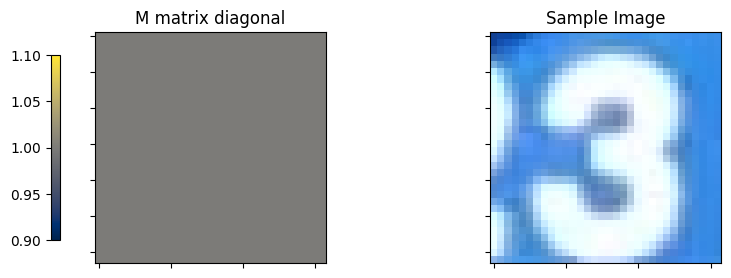

In [44]:
f, axarr = plt.subplots(1,2,figsize=(10, 3))
axarr[0].axes.xaxis.set_ticklabels([])
axarr[0].axes.yaxis.set_ticklabels([])
axarr[1].axes.xaxis.set_ticklabels([])
axarr[1].axes.yaxis.set_ticklabels([])

pcm = axarr[0].imshow(np.mean(np.diag(M).reshape(3,32,32),axis=0),cmap='cividis')
axarr[0].set_title("M matrix diagonal")
f.colorbar(mappable=pcm, ax=axarr[0], shrink=0.8,location="left")
axarr[1].imshow(torch.moveaxis(trainset0[3][0],0,2))
axarr[1].set_title("Sample Image")
print()

Here we plot the diagonal (averaged across channels) of the M matrix to see which coordinates are being highlighted by RFM. The center of the image is highlighted (where the digits appear). 